 # Step 1: Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Loading the Dataset

In [ ]:
data = pd.read_csv("C:\\Users\\Admin\\Documents\\Business Analytics RB\\finalproject_dataset_group4.csv")
data

,Feature1,Feature2,Feature3,Feature4
0,-1.310168,4.083988,8.821271,13.806908
1,-0.835933,8.889155,3.930402,5.829701
2,0.001279,9.217252,7.010031,5.185092
3,1.413789,4.427689,4.881688,13.408670
4,-0.953064,2.487238,4.596612,13.835109
...,...,...,...,...
995,0.053178,29.136442,-26.508748,26.068357
996,0.494968,23.848995,-25.890983,31.537393
997,-0.297539,22.046825,-23.905019,30.627014
998,1.677481,19.055648,-22.097171,24.681719


# Step 2: Data Visualization and Cleaning

### Analyzing Dataset

In [ ]:
data.head(10)

,Feature1,Feature2,Feature3,Feature4
0,-1.310168,4.083988,8.821271,13.806908
1,-0.835933,8.889155,3.930402,5.829701
2,0.001279,9.217252,7.010031,5.185092
3,1.413789,4.427689,4.881688,13.408670
4,-0.953064,2.487238,4.596612,13.835109
5,-1.128864,6.576714,5.110623,6.032937
6,-0.599472,9.665843,1.854996,15.318238
7,0.337466,6.364465,NaN,11.437355
8,1.223708,9.702224,6.691466,13.306232
9,-0.086509,3.618080,6.535085,7.804391


- We can observe one missing value in 8th row of `Feature3`.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Feature1  1000 non-null   float64
 1   Feature2  950 non-null    float64
 2   Feature3  950 non-null    float64
 3   Feature4  900 non-null    float64
dtypes: float64(4)
memory usage: 31.4 KB


### Plotting the data points on a graph

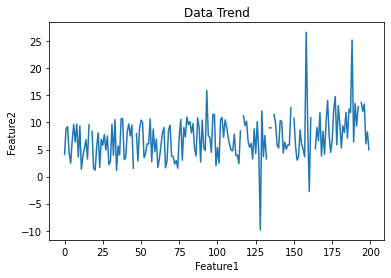

In [ ]:
# Feature1 & Feature2

plt.plot(data.iloc[0:200,1])
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.title('Data Trend')
plt.show()

- After looking at the graph we can say that there is no clear upward or downward trend, suggests that over the range of `Feature1` being considered, `Feature2` does not show a long-term increase or decrease.


- From the above graph we can also see that there are missing values present in `Feature2` majorly in between the of range `100` to `150`.

###  Identifying missing values

In [ ]:
data.isnull().sum()

Feature1      0
Feature2     50
Feature3     50
Feature4    100
dtype: int64

### Handling the missing values

In [ ]:
data_interpolated = data.interpolate()

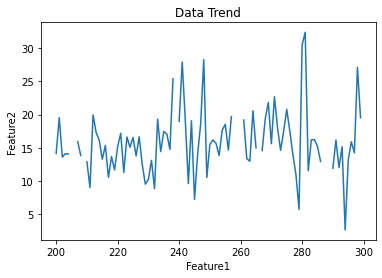

In [ ]:
# Feature1 and Feature2 graphs before applying cleaned data

plt.plot(data.iloc[200:300,3])
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.title('Data Trend')
plt.show()

- In this graph we can see empty spaces in the trend displaying missing values.(**Before applying interpolated data**)

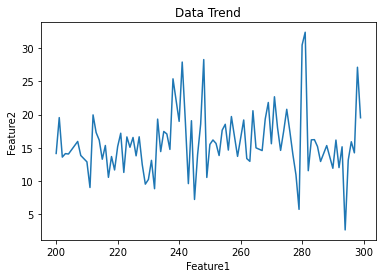

In [ ]:
# Feature1 and Feature2 graphs after applying cleaned data

plt.plot(data_interpolated.iloc[200:300,3])
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.title('Data Trend')
plt.show()

- The same graph now shows a complete pattern with 0 missing values in the data. **(After applying interpolated data)**

### Identifying Outliers

Text(0.5, 0, 'Feature1')

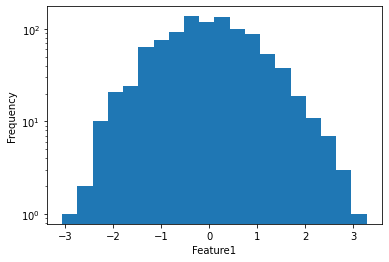

In [ ]:
# For Feature1
ax = data_interpolated['Feature1'].plot(kind = 'hist', bins=20, title= '', log = True)
ax.set_xlabel('Feature1')

The data points that fall beyond 3 standard deviations from the mean should be considered as outliers.

Text(0.5, 0, 'Feature2')

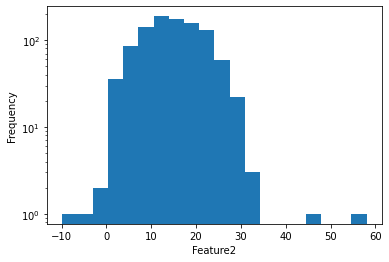

In [ ]:
# for Feature2
ax = data_interpolated ['Feature2'].plot(kind='hist', bins=20, title='', log=True)
ax.set_xlabel('Feature2')

In this graph there are separate bars beyond the value of `40` on the `Feature2` axis, which indicate infrequent occurrences of data points that are much higher than the rest of the dataset.

Text(0.5, 0, 'Feature3')

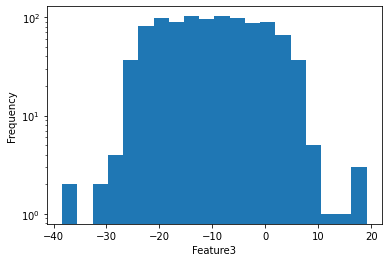

In [ ]:
# Feature3

ax = data_interpolated['Feature3'].plot(kind = 'hist', bins=20, title= '', log = True)
ax.set_xlabel('Feature3')

In this graph of `Feature3` bars to the extreme ends are outliers. Representing values less than `-30` on the left and more than
`15` to the right.

Text(0.5, 0, 'Feature4')

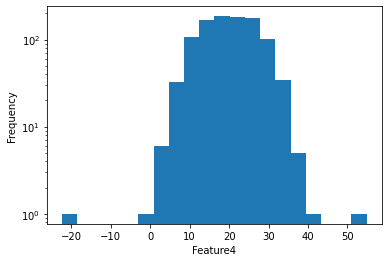

In [ ]:
# for Feature4

ax = data_interpolated ['Feature4'].plot(kind='hist', bins=20, title='', log=True)
ax.set_xlabel('Feature4')

It is observable that outliers in this graph are on the extremes of `Feature4` axis. Bars to extreme left below `-15` and bars to the extreme right more than `40` shows the presence of outliers.

### Correlation Analysis

In [ ]:
# Performing correlation analysis on the cleaned dataset

correlation = data_interpolated[['Feature1', 'Feature2', 'Feature3', 'Feature4']].corr()

# Displaying the correlation between 'Feature1', 'Feature2', 'Feature3', 'Feature4'

correlation

,Feature1,Feature2,Feature3,Feature4
Feature1,1.000000,-0.013179,0.033310,-0.018880
Feature2,-0.013179,1.000000,-0.762603,0.662528
Feature3,0.033310,-0.762603,1.000000,-0.756384
Feature4,-0.018880,0.662528,-0.756384,1.000000


from the above correlation coefficient table we can see following relations between all four features from the dataset:

- `Feature1` and `Feature2` have a correlation of approximately -0.013, which suggests there's virtually no linear relationship    between them.
- `Feature1` and `Feature3` show a very slight positive correlation of approximately 0.033, indicating a negligible linear          relationship.
- `Feature1` and `Feature4` also display a negligible negative correlation of approximately -0.018.
- `Feature2`and `Feature3` have a significant negative correlation of approximately -0.762, suggesting that as `Feature2`          increases, `Feature3` tends to decrease quite consistently.
- `Feature2` and `Feature4` show a substantial positive correlation of approximately 0.662, meaning that they tend to increase      together.
- `Feature3` and `Feature4` exhibit a strong negative correlation of approximately -0.756, indicating that as `Feature3`            increases, `Feature4` tends to decrease, and vice versa.

- Now we will export the cleaned data to the local device, as it's original format is of **.csv** file we have export the dataset in **.csv** format as well.

In [ ]:
data_interpolated.to_csv('C://Users//Admin//Documents//cleaned_dataset.csv', index=False) # To Export Cleaned Data into Excel file

